In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier
from sklearn import model_selection, svm, datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, explained_variance_score, r2_score, accuracy_score
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import datetime as dt
import importlib as il
import matplotlib.pyplot as plt

In [2]:
#My own functions to make random forest modeling easier.
import randfor_functions as rf
dir(rf)
#find optimal depth for a random forest classifier
#run random forest classifier and get info
#run random forest classifier and print info
#run random forest regressor and get info
#run random forest regressor and print info
#visualize classifier

['ExtraTreesClassifier',
 'RandomForestClassifier',
 'RandomForestRegressor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'confusion_matrix',
 'cross_val_score',
 'datasets',
 'dt',
 'explained_variance_score',
 'make_classification',
 'model_selection',
 'np',
 'r2_score',
 'rand_find_depth',
 'randfor_class_report',
 'randfor_class_talk',
 'randfor_reg_report',
 'randfor_reg_talk',
 'sklearn',
 'svm',
 'test_multiple_samples',
 'train_test_split',
 'tree_vis']

In [3]:
#Run this to reload the rf module after I make changes
il.reload(rf)

<module 'randfor_functions' from 'C:\\Users\\marcu\\Dropbox\\Capstone_2\\randfor_functions.py'>

In [4]:
starttime = dt.datetime.now()
propval = pd.read_csv('clean_propval_final.csv')
print('elapsed time:', dt.datetime.now()-starttime)

C:\Users\marcu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,22,24,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


elapsed time: 0:00:36.603201


In [ ]:
propval.head()

In [ ]:
#Start with runnning what we can

In [ ]:
#TODO:Check these
#ind_vars = propval[['BORO', 'BLOCK', 'LOT', 'SECVOL', 'YRB', 'LND_AREA', 'STORY',
#                   'ZIP', 'YRA1', 'PROTEST0',
#                   'PROTEST1', 'PROTEST5', 'PROTEST6', 'PROTEST8', 'PROTEST9',
#                   'PROTEST1L', 'PROTEST6L', 'PROTEST6NL', 'PROTEST6E',
#                   'PROTEST8L', 'TN_AVT_A']]
#ind_vars = propval[['BORO', 'BLOCK', 'LOT', 'SECVOL', 'YRB', 'LND_AREA',
#                   'ZIP', 'YRA1', 'PROTEST0', 'TN_AVT_A']]
#dep_vars = propval['FN_AVT_A']

In [ ]:
#Due to space issues, we're going to test one borough at a time

In [ ]:
man_propval = propval[propval.BORO == 1]
bron_propval = propval[propval.BORO == 2]
broo_propval = propval[propval.BORO == 3]
que_propval = propval[propval.BORO == 4]
sta_propval = propval[propval.BORO == 5]

In [ ]:
boro_propval = [man_propval, bron_propval, broo_propval, que_propval, sta_propval]
boro_names = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']

In [ ]:
for x in boro_propval:
    print(len(x))

In [ ]:
for boro in boro_propval:
    boro_mean = np.mean(boro.FN_AVT_A)
    boro.EXPENSIVE = boro.FN_AVT_A >= boro_mean

In [ ]:
propval_mean = np.mean(propval.FN_AVT_A)
propval['EXPENSIVE'] = propval['FN_AVT_A'] >= propval_mean

In [ ]:
#Overall the expensive metric looks to be a good classifier. Least even with manhattan data,
#but still over 1/3 of the data.
for boro in boro_propval:
    print(boro.EXPENSIVE.value_counts())

In [ ]:
ind_names = ['BLOCK', 'LOT', 'SECVOL', 'YRB', 'LND_AREA', 'YRA1', 'PROTEST0']
def get_class_vars(data, ind_names):
    ind_vars = data[ind_names]
    dep_vars = data.EXPENSIVE
    return ind_vars, dep_vars

def get_reg_vars(data, ind_names):
    ind_cla_vars = data[ind_names]
    dep_cla_vars = data.FN_AVT_A
    return ind_vars, dep_vars

In [ ]:
ind_vars, dep_vars = get_class_vars(man_propval)

In [ ]:
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 20, None, 100)

In [ ]:
ind_vars, dep_vars = get_reg_vars(man_propval)

In [ ]:
rf.randfor_reg_talk(ind_vars, man_propval.FN_AVT_A, 1000, 20, None, 100)

In [ ]:
#According to these results, BLOCK and SECVOL are pretty important. I haven't been able to determine
#what SECVOL is, but I suspect it's geographical, so I'm excluding it from the data
#in favor of BLOCK. LND_AREA is pretty valuable, but year built is actually less important
#than year of alteration. Also, I see that protest and lot have almost no value. The YRB thing may
#be because I picked a bad fill for the YRB zeroes, but when they take only 5% of the dataset,
#it shouldn't be a big issue.

In [ ]:
#Valuable features:
#BLOCK, LND_AREA
#YRA1

In [ ]:
#Irrelevant features:
#SECVOL, ZIP, YEAR4, STORY, PROTEST0, YRB, L_ACRE

In [ ]:
ind_names = ['BLOCK', 'LND_AREA', 'YRA1']
ind_vars, dep_vars = get_class_vars(man_propval)
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 20, None, 100)

In [ ]:
rf.randfor_reg_talk(ind_vars, man_propval.FN_AVT_A, 1000, 20, None, 100)

In [ ]:
#Secvol is complely useless here, which is interesting. I'm thinking it's probably not worth
#including going forward.

In [ ]:
#Next: Check what happens when I add in tentative valuation.

In [ ]:
ind_names = ['BORO', 'BLOCK', 'LOT', 'TN_AVT_A']
ind_vars, dep_vars = get_class_vars(man_propval)
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 20, None, 100)

In [ ]:
rf.randfor_reg_talk(ind_vars, man_propval.FN_AVT_A, 1000, 20, None, 100)

In [ ]:
#After reviewing 1976 US code supplement 1, page 584, section 10785, it looks like the
#tentative valuation becomes final unless contested by a protest within 30 days, so in most cases
#this is just the exact final value. Not much point there, but I will note that this seems to
#break the feature weighting. Not sure what's going on there.

In [ ]:
#So far, location seems to be far and away the most important factor. We'll see if this holds
#for the other boroughs.

In [ ]:
#Going to run a full check to verify that these remain roughly as important across all five boroughs.
#Crude forest, but it'll tell me the essentials.
ind_names = ['BLOCK', 'LND_AREA', 'YRA1']
for boro in range(len(boro_propval)):
    print(boro_names[boro])
    print('------------------------')
    ind_vars, dep_vars = get_class_vars(boro_propval[boro])
    rf.randfor_class_talk(ind_vars, dep_vars, 75, 10, None, 500)
    print('------------------------')

In [ ]:
#Simplest possible approach: 
#Assume data is similar

In [ ]:
#Todo: Check corellation coefficient for geographical data
#Value leakage: protest based on final valuation?
#Convert datetimes to strings, on the fly convert to datetime for running operations

In [ ]:
#Block and land area continue to be relevant, but how much varies. Bronx, in particular,
#seems like it needs a better model. Total elapsed time to run this model for five separate 
#boroughs: ~15 minutes. I'm going to try again with the full propval and see how long this takes.

In [ ]:
ind_vars, dep_vars = get_class_vars(propval)
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 20, None, 100)

In [ ]:
propval_samples = []
for x in range(10):
    propval_samples.append(propval.sample(frac = .01, replace = False))

In [ ]:
ind_names = ['BORO', 'BLOCK', 'LND_AREA', 'YRB']

In [ ]:
test = {1:'one', 2:'two', 3:'three'}

In [ ]:
for n in test:
    print(n)
    print(test[n])

In [ ]:
train_scores = []
test_scores = []
f1_scores = []
feature_weights = {}
starttime = dt.datetime.now()
for x in range(len(propval_samples)):
    ind_vars, dep_vars = get_class_vars(propval_samples[x])
    train_score, test_score, f1_score, cm, precision_score, recall_score, importances, indices =\
    rf.randfor_class_report(ind_vars, dep_vars, 1000, 20, None, 100)
    train_scores.append(train_score)
    test_scores.append(test_score)
    f1_scores.append(f1_score)
    for f in range(len(indices)):
        if indices[f] not in feature_weights:
            feature_weights[indices[f]] = [importances[indices[f]]]
        else:
            feature_weights[indices[f]].append(importances[indices[f]])
    print('test complete')
print('train scores mean, std: ', np.mean(train_scores), ', ', np.std(train_scores))
print('test scores mean, std: ', np.mean(test_scores), ', ', np.std(test_scores))
print('f1 scores mean, std: ', np.mean(f1_scores), ', ', np.std(f1_scores))
print('feature weights mean, std:')
for f in feature_weights:
    print(ind_vars.columns[indices[f]], ': ', np.mean(feature_weights[f]), ', ',np.std(feature_weights[f]))
print('elapsed time: ', dt.datetime.now()-starttime)

In [ ]:
ind_names = ['ZIP', 'LND_AREA', 'YRB']

In [ ]:
test_multiple_samples(propval_samples, ind_names, 1000, 20, None, 100)

In [ ]:
#Looks like a random sample will give us pretty good data with minimal variation. Impressive.

In [ ]:
#OK: We want to avoid data corellation. BLOCK and BORO overlap because manhattan never goes above
#2255 but bronx has almost 6K, brooklyn and staten 8K, Queens 16. ZIP avoids that, but is less
#precise.
#BLOCK is the most precise but also overlapps. 
#Splitting the data up by borough and modeling each one independently creates its own, worse problems.


In [ ]:
#Trying to keep these tests free of corellation. ZIP has the geographical component.
#LND_AREA has the land-area component. YRB has the year constructed. YEAR4 has the year evaluated,
#which is a little more dubious to include but still valuable data.

In [ ]:
ind_names = ['ZIP', 'LND_AREA', 'YRB', 'YEAR4']
propval_samples = []
for x in range(10):
    propval_samples.append(propval.sample(frac = .01, replace = False))
test_multiple_samples(propval_samples, ind_names, 1000, 20, None, 100)

In [ ]:
#Minimal improvement, but adding year does appear to be beneficial.

In [ ]:
ind_names = ['ZIP', 'LND_AREA', 'YRB', 'YEAR4', 'TOT_UNIT']
propval_samples = propval.sample(frac = .01, replace = False)
test_multiple_samples(propval_samples, ind_names, 1000, 20, None, 100)

In [ ]:
#TOT_UNIT may have some geopgraphical connotations. The interesting thing is that YEAR4 jumped
#in value when we added this.

In [ ]:
ind_names = ['ZIP', 'LND_AREA', 'YRB', 'YEAR4', 'RES_UNIT']
propval_samples = []
for x in range(10):
    propval_samples.append(propval.sample(frac = .01, replace = False))
test_multiple_samples(propval_samples, ind_names, 1000, 20, None, 100)

In [ ]:
#RES_UNIT and TOT_UNIT almost completely identical.

In [ ]:
ind_names = ['ZIP', 'L_ACRE', 'YRB', 'YEAR4', 'TOT_UNIT']
propval_samples = []
for x in range(10):
    propval_samples.append(propval.sample(frac = .01, replace = False))
test_multiple_samples(propval_samples, ind_names, 1000, 20, None, 100)

In [ ]:
#L_ACRE underperforms against LND_AREA

In [ ]:
ind_names = ['ZIP', 'LND_AREA', 'YRB', 'YEAR4']
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_class_vars(propval_samples, ind_names)
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 20, None, 100)

In [ ]:
ind_names = ['ZIP', 'TOT_UNIT', 'YRB', 'YEAR4']
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_class_vars(propval_samples, ind_names)
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 20, None, 100)

In [ ]:
ind_names = ['ZIP', 'TOT_UNIT', 'YRB', 'YEAR4', 'LND_AREA']
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_class_vars(propval_samples, ind_names)
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 20, None, 100)

In [ ]:
propval.columns[50:75]

In [ ]:
propval.EX_COUNT.value_counts()

In [ ]:
ind_names = ['ZIP', 'TOT_UNIT', 'YRB_NEW', 'YEAR4', 'LND_AREA', 'EX_COUNT']
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_class_vars(propval_samples, ind_names)
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 20, None, 100)

In [ ]:
ind_names = ['ZIP', 'TOT_UNIT', 'YRB_NEW', 'YEAR4', 'LND_AREA']
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_reg_vars(propval_samples, ind_names)
rf.randfor_reg_talk(ind_vars, dep_vars, 1000, 10, None, 100)

In [ ]:
ind_names = ['ZIP', 'TOT_UNIT', 'YRB_NEW', 'YEAR4', 'LND_AREA', 'STORY']
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_reg_vars(propval_samples, ind_names)
rf.randfor_reg_talk(ind_vars, dep_vars, 1000, 10, None, 100)

In [ ]:
propval.columns

In [ ]:
propval_actual = propval.columns[2:]

In [ ]:
propval = propval[propval_actual]

In [ ]:
propval_indep_reg = ['BORO', 'BLOCK', 'LOT', 'SECVOL',
       'DISTRICT', 'YEAR4',
       'ZIP', 'TOT_UNIT', 'RES_UNIT', 'LFRT_DEC',
       'LDEP_DEC', 'BFRT_DEC', 'BDEP_DEC', 'STORY', 'LND_AREA', 'GR_SQFT',
       'ZONING', 'YRB_FLAG', 'CP_BORO', 'CP_DIST', 'STATUS1', 'EX_INDS',
       'EX_COUNT', 'CBN_TXCL1', 'CBN_TXCL0',
       'CBN_TXCL1B', 'CBN_TXCL1A', 'BLDGCLA', 'BLDGCLB', 'BLDGCLC', 'BLDGCLR',
       'BLDGCLV', 'BLDGCLS', 'EXTG', 'EXTEG', 'EXTE', 'YRB_NEW', 'YRB_OLD',
       'EXPENSIVE']
propval_indep_class = ['BORO', 'BLOCK', 'LOT', 'SECVOL',
       'DISTRICT', 'YEAR4',
       'ZIP', 'TOT_UNIT', 'RES_UNIT', 'LFRT_DEC',
       'LDEP_DEC', 'BFRT_DEC', 'BDEP_DEC', 'STORY', 'LND_AREA', 'GR_SQFT',
       'ZONING', 'YRB_FLAG', 'CP_BORO', 'CP_DIST', 'STATUS1', 'EX_INDS',
       'EX_COUNT', 'CBN_TXCL1', 'CBN_TXCL0',
       'CBN_TXCL1B', 'CBN_TXCL1A', 'BLDGCLA', 'BLDGCLB', 'BLDGCLC', 'BLDGCLR',
       'BLDGCLV', 'BLDGCLS', 'EXTG', 'EXTEG', 'EXTE', 'YRB_NEW', 'YRB_OLD']

In [ ]:
#Testing all variables to see which correlated ones we keep

In [ ]:
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_class_vars(propval_samples, propval_indep_class)
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 10, None, 100)

In [ ]:
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_reg_vars(propval_samples, propval_indep_class)
rf.randfor_reg_talk(ind_vars, dep_vars, 1000, 10, None, 100)

In [ ]:
propval_indep_reg = ['LOT', 'YEAR4', 'ZIP', 'TOT_UNIT', 'RES_UNIT', 'LFRT_DEC',
       'LDEP_DEC', 'BFRT_DEC', 'BDEP_DEC', 'STORY', 'LND_AREA', 'GR_SQFT',
       'ZONING', 'YRB_FLAG', 'CP_BORO', 'CP_DIST', 'STATUS1', 'EX_INDS',
       'EX_COUNT', 'CBN_TXCL1', 'BLDGCLS', 'EXTG', 'YRB_NEW', 'YRB_OLD',
       'EXPENSIVE']
propval_indep_class = ['LOT', 'YEAR4', 'ZIP', 'TOT_UNIT', 'RES_UNIT', 'LFRT_DEC',
       'LDEP_DEC', 'BFRT_DEC', 'BDEP_DEC', 'STORY', 'LND_AREA', 'GR_SQFT',
       'ZONING', 'YRB_FLAG', 'CP_BORO', 'CP_DIST', 'STATUS1', 'EX_INDS',
       'EX_COUNT', 'CBN_TXCL1', 'BLDGCLS', 'EXTG', 'YRB_NEW', 'YRB_OLD']

In [ ]:
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_class_vars(propval_samples, propval_indep_class)
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 10, None, 100)

In [ ]:
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_reg_vars(propval_samples, propval_indep_reg)
rf.randfor_reg_talk(ind_vars, dep_vars, 1000, 10, None, 100)

In [ ]:
#Cut everything scoring <1% importance and stick to only the new YRB data.

In [ ]:
propval_indep_reg = ['YEAR4', 'ZIP', 'LFRT_DEC',
       'BFRT_DEC', 'BDEP_DEC', 'LND_AREA', 'GR_SQFT',
       'ZONING', 'CP_BORO', 'CP_DIST', 'YRB_NEW',
       'EXPENSIVE']
propval_indep_class = ['YEAR4', 'ZIP', 'LFRT_DEC',
       'BFRT_DEC', 'BDEP_DEC', 'LND_AREA', 'GR_SQFT',
       'ZONING', 'CP_BORO', 'CP_DIST', 'YRB_NEW']

In [ ]:
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_class_vars(propval_samples, propval_indep_class)
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 10, None, 100)

In [ ]:
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_reg_vars(propval_samples, propval_indep_reg)
rf.randfor_reg_talk(ind_vars, dep_vars, 1000, 10, None, 100)

In [ ]:
#once more, with the old YRB data

In [ ]:
propval_indep_reg = ['YEAR4', 'ZIP', 'LFRT_DEC',
       'BFRT_DEC', 'BDEP_DEC', 'LND_AREA', 'GR_SQFT',
       'ZONING', 'CP_BORO', 'CP_DIST', 'YRB_OLD',
       'EXPENSIVE']
propval_indep_class = ['YEAR4', 'ZIP', 'LFRT_DEC',
       'BFRT_DEC', 'BDEP_DEC', 'LND_AREA', 'GR_SQFT',
       'ZONING', 'CP_BORO', 'CP_DIST', 'YRB_OLD']

In [ ]:
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_class_vars(propval_samples, propval_indep_class)
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 10, None, 100)

In [ ]:
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_reg_vars(propval_samples, propval_indep_reg)
rf.randfor_reg_talk(ind_vars, dep_vars, 1000, 10, None, 100)

In [ ]:
#Next: examine running the model with %difference from borough mean as the predictor

In [ ]:
mean_valuation = propval.groupby('BORO').mean()

In [ ]:
mean_valuation = mean_valuation.FN_AVT_A.values

In [ ]:
#Zero-padding for future indexing
mv = [0]
for x in mean_valuation:
    mv.append(x)

In [ ]:
mv

In [ ]:
propval['FN_AVT_A_DIFF'] = propval['FN_AVT_A']

In [ ]:
fn_avt_a_diff = []
for index, row in propval.iterrows():
    pct_diff = (row.FN_AVT_A/mv[row.BORO])*100
    fn_avt_a_diff.append(pct_diff)

In [ ]:
above_mean = []
for valuation in fn_avt_a_diff:
    is_above = valuation >= 100
    above_mean.append(is_above)

In [ ]:
propval['FN_AVT_A_DIFF'] = fn_avt_a_diff
propval['ABOVE_MEAN'] = above_mean

In [123]:
propval_indep_reg = ['YEAR4', 'ZIP', 'LFRT_DEC',
       'BFRT_DEC', 'BDEP_DEC', 'LND_AREA', 'GR_SQFT',
       'ZONING', 'CP_BORO', 'CP_DIST', 'YRB_OLD']
propval_indep_class = ['YEAR4', 'ZIP', 'LFRT_DEC',
       'BFRT_DEC', 'BDEP_DEC', 'LND_AREA', 'GR_SQFT',
       'ZONING', 'CP_BORO', 'CP_DIST', 'YRB_OLD']

In [39]:
def get_class_vars(data, ind_names, dep):
    ind_vars = data[ind_names]
    dep_vars = data[dep]
    return ind_vars, dep_vars

def get_reg_vars(data, ind_names, dep):
    ind_vars = data[ind_names]
    dep_vars = data[dep]
    return ind_vars, dep_vars

In [140]:
propval_indep_class = ['YEAR4', 'ZIP', 'LFRT_DEC',
       'BFRT_DEC', 'BDEP_DEC', 'LND_AREA', 'GR_SQFT',
       'ZONING', 'CP_DIST', 'YRB_OLD']

In [127]:
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_class_vars(propval_samples, propval_indep_class, 'EXPENSIVE')
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 10, None, 100)

train score: 0.8660718434871509
test score: 0.8537673381194675
f1 score 0.8325083825642663
confusion_matrix:
[[7035 1056]
 [1042 5214]]
precision score: 0.8315789473684211
recall score: 0.8334398976982097
columns: 10
rows: 57385
total data: 573850
feature importances:
GR_SQFT: 0.3694457292857355
ZIP: 0.12669050837568593
YRB_OLD: 0.10865996823962298
CP_DIST: 0.10717147845437887
BFRT_DEC: 0.0710461758524853
YEAR4: 0.06673633589611372
LND_AREA: 0.05638919061877732
LFRT_DEC: 0.04289416794184811
ZONING: 0.03723599505588735
BDEP_DEC: 0.013730450279465033
elapsed time: 0:01:31.872581


In [ ]:
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_reg_vars(propval_samples, propval_indep_reg)
rf.randfor_reg_talk(ind_vars, dep_vars, 1000, 10, None, 1000)

In [ ]:
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_reg_vars(propval_samples, propval_indep_reg)
rf.randfor_reg_talk(ind_vars, dep_vars, 1000, 10, None, 1000)

In [ ]:
#So, superhigh variance here. I don't think just 1% of the data will do here. Kicking it up to 10%.

In [130]:
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_reg_vars(propval_samples, propval_indep_reg, 'FN_AVT_A')
rf.randfor_reg_talk(ind_vars, dep_vars, 1000, 10, None, 1000)

explained variance (train data) 0.41759540463924616
explained variance (test data) 0.05815793618378107
r^2 score(train data): 0.41759532885355843
r^2 score (test data): 0.0580764902105223
feature importances
GR_SQFT: 0.5972193176267132
ZIP: 0.23473653169037037
LFRT_DEC: 0.08182942137614274
BFRT_DEC: 0.03320439996085412
YRB_OLD: 0.023766822231388214
LND_AREA: 0.018406287314807795
YEAR4: 0.010837219799723507
elapsed time: 0:01:00.589598


In [ ]:
#Better. Upon further examination, the weights indicate I can cut most of these. Let's try again:

In [41]:
propval_indep_reg = ['ZIP', 'LFRT_DEC',
       'BFRT_DEC', 'LND_AREA', 'GR_SQFT',
       'YRB_OLD', 'YEAR4']

In [132]:
train_results = []
test_results = []
for x in range(10):
    propval_samples = propval.sample(frac = .01, replace = False)
    ind_vars, dep_vars = get_reg_vars(propval_samples, propval_indep_reg, 'FN_AVT_A')
    exp_train, exp_test, r_train, r_test, importances, indices = \
    rf.randfor_reg_report(ind_vars, dep_vars, 1000, 10, None, 1000)
    train_results.append(exp_train)
    test_results.append(exp_test)

In [134]:
np.mean(test_results)

-0.05552823376841454

In [135]:
np.std(test_results)

0.9097761746587053

In [136]:
np.log(100)

4.605170185988092

In [37]:
logval = []
for index, row in propval.FN_AVT_A.iteritems():
    if row != 0:
        logval.append(np.log(row))
    else:
        logval.append(0)
propval['LOGVAL'] = logval

In [139]:
train_results = []
test_results = []
for x in range(10):
    propval_samples = propval.sample(frac = .01, replace = False)
    ind_vars, dep_vars = get_reg_vars(propval_samples, propval_indep_class, 'LOGVAL')
    exp_train, exp_test, r_train, r_test, importances, indices = \
    rf.randfor_reg_report(ind_vars, dep_vars, 1000, 10, None, 1000)
    train_results.append(exp_train)
    test_results.append(exp_test)

In [141]:
np.mean(test_results)

0.6286045229357395

In [142]:
np.std(test_results)

0.025458978859284602

In [143]:
wide_train_results = []
wide_test_results = []
for x in range(10):
    propval_samples = propval.sample(frac = .01, replace = False)
    ind_vars, dep_vars = get_reg_vars(propval_samples, propval_indep_class, 'LOGVAL')
    exp_train, exp_test, r_train, r_test, importances, indices = \
    rf.randfor_reg_report(ind_vars, dep_vars, 1000, 10, None, 1000)
    wide_train_results.append(exp_train)
    wide_test_results.append(exp_test)

In [144]:
np.mean(wide_test_results)

0.6262949155391826

In [145]:
np.std(wide_test_results)

0.02456846429991413

In [50]:
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_reg_vars(propval_samples, propval_indep_reg, 'LOGVAL')
rf.randfor_reg_talk(ind_vars, dep_vars, 1000, 10, None, 1000)

explained variance (train data) 0.6295002135009694
explained variance (test data) 0.6463658677470572
r^2 score(train data): 0.6295002132352137
r^2 score (test data): 0.6463554638051612
feature importances
GR_SQFT: 0.7486358036298013
LND_AREA: 0.11505810171952484
ZIP: 0.05820527072662586
LFRT_DEC: 0.035844193581989495
YRB_OLD: 0.028668026150199623
YEAR4: 0.007500475933731754
BFRT_DEC: 0.006088128258127243
elapsed time: 0:00:54.484556


In [42]:
propval_samples = propval.sample(frac = .1, replace = False)
ind_vars, dep_vars = get_reg_vars(propval_samples, propval_indep_reg, 'LOGVAL')
rf.randfor_reg_talk(ind_vars, dep_vars, 1000, 10, None, 1000)

explained variance (train data) 0.7007610475447454
explained variance (test data) 0.6941210150962642
r^2 score(train data): 0.7007610467170671
r^2 score (test data): 0.6941207417912768
feature importances
GR_SQFT: 0.6737890532700453
LND_AREA: 0.1349480907664804
ZIP: 0.0841855569793453
LFRT_DEC: 0.04615951312280014
YRB_OLD: 0.03862105694002638
BFRT_DEC: 0.013132972423513902
YEAR4: 0.009163756497788599
elapsed time: 0:15:01.349061


In [43]:
propval_samples = propval.sample(frac = .1, replace = False)
ind_vars, dep_vars = get_reg_vars(propval_samples, propval_indep_reg, 'LOGVAL')
rf.randfor_reg_talk(ind_vars, dep_vars, 100, 10, None, 1000)

explained variance (train data) 0.6940573062372333
explained variance (test data) 0.6804216444768326
r^2 score(train data): 0.6940573024740259
r^2 score (test data): 0.680421385345253
feature importances
GR_SQFT: 0.6655544885509872
LND_AREA: 0.13404138311659172
ZIP: 0.08438765553327934
LFRT_DEC: 0.05443926460127759
YRB_OLD: 0.038514905392372005
BFRT_DEC: 0.014063933966407984
YEAR4: 0.008998368839084092
elapsed time: 0:01:30.588992


In [64]:
features = ['Gross sq. ft.', 'Land area', 'ZIP code', 'Lot frontage', 'Year built',\
           'Year of valuation', 'Building frontage (ft)']
importances = [.749, .115, .058, .036, .029, .008, .006]

In [65]:
features.reverse()
importances.reverse()

In [45]:
ind_vars, dep_vars = get_reg_vars(propval, propval_indep_reg, 'LOGVAL')
rf.randfor_reg_talk(ind_vars, dep_vars, 100, 10, None, 1000)

explained variance (train data) 0.7193245881874226
explained variance (test data) 0.7167277587533805
r^2 score(train data): 0.7193245881133157
r^2 score (test data): 0.7167271666409624
feature importances
GR_SQFT: 0.6443425439472978
LND_AREA: 0.13973169221062795
ZIP: 0.09455222414659244
LFRT_DEC: 0.054404215979006534
YRB_OLD: 0.04543411643092896
BFRT_DEC: 0.011468453302850077
YEAR4: 0.010066753982696392
elapsed time: 0:21:55.521460


Text(0, 0.5, 'Feature name')

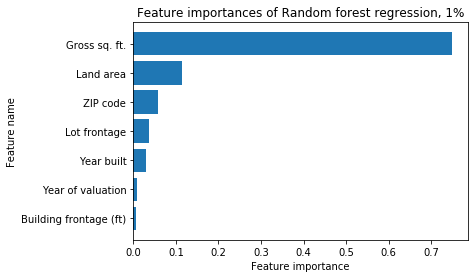

In [66]:
plt.barh(features, importances)
plt.title('Feature importances of Random forest regression, 1%')
plt.xlabel("Feature importance")
plt.ylabel('Feature name')

In [61]:
features = ['Gross sq. ft.', 'Land area', 'ZIP code', 'Lot frontage', 'Year built',\
           'Building frontage', 'Year of valuation']
importances = [.644, .140, .095, .054, .045, .011, .010]

In [62]:
features.reverse()
importances.reverse()

Text(0, 0.5, 'Feature name')

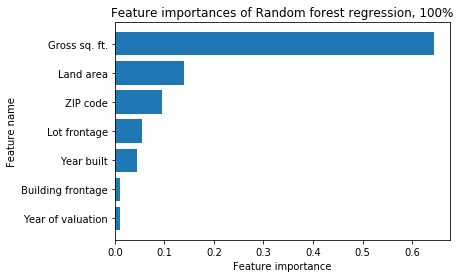

In [63]:
plt.barh(features, importances)
plt.title('Feature importances of Random forest regression, 100%')
plt.xlabel("Feature importance")
plt.ylabel('Feature name')

In [148]:
min(propval.YEAR4)

2010

In [149]:
max(propval.YEAR4)

2017

In [ ]:
propval_samples = propval.sample(frac = .1, replace = False)
ind_vars, dep_vars = get_reg_vars(propval_samples, propval_indep_reg)
rf.randfor_reg_talk(ind_vars, dep_vars, 1000, 10, None, 1000)

In [ ]:
#I really don't think I should be seeing this much variance. 
#Time to crawl back through the scoring code.

In [ ]:
#Can't find anything obviously wrong. Vexing.
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_reg_vars(propval_samples, propval_indep_reg)
rf.randfor_reg_talk(ind_vars, dep_vars, 1000, 10, None, 1000)

In [ ]:
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_reg_vars(propval_samples, propval_indep_reg)
rf.randfor_reg_talk(ind_vars, dep_vars, 1000, 10, None, 1000)

In [ ]:
#I'm not sure what's going wrong here, but I'll talk to Blake about it?
#Going to try SGD, see if that exhibits similar issues.

In [150]:
propval_samples = propval.sample(frac = .0001, replace = False)
ind_vars, dep_vars = get_class_vars(propval_samples, propval_indep_class, 'EXPENSIVE')
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 10, None, 1000)

train score: 0.5744186046511628
test score: 0.5902777777777778
f1 score 0.0
confusion_matrix:
[[85  0]
 [59  0]]
precision score: 0.0
recall score: 0.0
columns: 10
rows: 574
total data: 5740
feature importances:
YRB_OLD: 0.0
CP_DIST: 0.0
ZONING: 0.0
GR_SQFT: 0.0
LND_AREA: 0.0
BDEP_DEC: 0.0
BFRT_DEC: 0.0
LFRT_DEC: 0.0
ZIP: 0.0
YEAR4: 0.0
elapsed time: 0:00:00.677782


C:\Users\marcu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\marcu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [154]:
propval_samples = propval.sample(frac = .0005, replace = False)
ind_vars, dep_vars = get_class_vars(propval_samples, propval_indep_class, 'EXPENSIVE')
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 10, None, 1000)

train score: 0.701534170153417
test score: 0.7256267409470752
f1 score 0.6868044515103339
confusion_matrix:
[[305 100]
 [ 97 216]]
precision score: 0.6835443037974683
recall score: 0.6900958466453674
columns: 10
rows: 2869
total data: 28690
feature importances:
GR_SQFT: 0.97
BFRT_DEC: 0.03
YRB_OLD: 0.0
CP_DIST: 0.0
ZONING: 0.0
LND_AREA: 0.0
BDEP_DEC: 0.0
LFRT_DEC: 0.0
ZIP: 0.0
YEAR4: 0.0
elapsed time: 0:00:01.936397


In [151]:
propval_samples = propval.sample(frac = .001, replace = False)
ind_vars, dep_vars = get_class_vars(propval_samples, propval_indep_class, 'EXPENSIVE')
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 10, None, 1000)

train score: 0.7483151289797816
test score: 0.7372822299651568
f1 score 0.6876553438276719
confusion_matrix:
[[643 180]
 [197 415]]
precision score: 0.6974789915966386
recall score: 0.6781045751633987
columns: 10
rows: 5738
total data: 57380
feature importances:
GR_SQFT: 0.7111469738198671
BFRT_DEC: 0.11453399492017213
LFRT_DEC: 0.08945884104497012
YRB_OLD: 0.06616495062404949
ZIP: 0.01061219258257567
LND_AREA: 0.004166319640885224
YEAR4: 0.003528233937621946
ZONING: 0.0002851578977974588
CP_DIST: 6.810120595789098e-05
BDEP_DEC: 3.523432610293295e-05
elapsed time: 0:00:03.638835


In [155]:
propval_samples = propval.sample(frac = .005, replace = False)
ind_vars, dep_vars = get_class_vars(propval_samples, propval_indep_class, 'EXPENSIVE')
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 10, None, 1000)

train score: 0.7840048329383336
test score: 0.7780566011431758
f1 score 0.7212885154061626
confusion_matrix:
[[3521  539]
 [1053 2060]]
precision score: 0.7926125432858792
recall score: 0.6617410857693543
columns: 10
rows: 28692
total data: 286920
feature importances:
GR_SQFT: 0.48597329844598147
YRB_OLD: 0.1310835059183279
BFRT_DEC: 0.11134797976008383
ZIP: 0.09644596429839708
YEAR4: 0.04820763238893592
CP_DIST: 0.04278187074860884
LND_AREA: 0.04240817349127923
LFRT_DEC: 0.022433002191580908
ZONING: 0.0110286859131394
BDEP_DEC: 0.008289886843665361
elapsed time: 0:00:27.662158


In [152]:
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars, dep_vars = get_class_vars(propval_samples, propval_indep_class, 'EXPENSIVE')
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 10, None, 1000)

train score: 0.807751289558065
test score: 0.8028856206872517
f1 score 0.7712344280860702
confusion_matrix:
[[6752 1410]
 [1418 4767]]
precision score: 0.7717338513841671
recall score: 0.7707356507679871
columns: 10
rows: 57385
total data: 573850
feature importances:
GR_SQFT: 0.43099523667634276
YRB_OLD: 0.12434068496182869
BFRT_DEC: 0.10461833151012895
ZIP: 0.0956489945025171
CP_DIST: 0.07522900767309942
YEAR4: 0.05587115547937059
LFRT_DEC: 0.0389324237089612
LND_AREA: 0.037409765022689216
ZONING: 0.02463776935944695
BDEP_DEC: 0.01231663110561505
elapsed time: 0:01:06.472703


In [156]:
propval_samples = propval.sample(frac = .05, replace = False)
ind_vars, dep_vars = get_class_vars(propval_samples, propval_indep_class, 'EXPENSIVE')
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 10, None, 1000)

train score: 0.8402782618393722
test score: 0.8369603100472599
f1 score 0.8096609866054717
confusion_matrix:
[[35162  5608]
 [ 6087 24874]]
precision score: 0.8160225706974608
recall score: 0.8033978230677303
columns: 10
rows: 286924
total data: 2869240
feature importances:
GR_SQFT: 0.40122272319173397
ZIP: 0.13064050600716604
YRB_OLD: 0.11412721456604558
CP_DIST: 0.08965345229164803
BFRT_DEC: 0.07437905733691158
YEAR4: 0.06100376828308923
LFRT_DEC: 0.04893224599042634
LND_AREA: 0.042869506047958764
ZONING: 0.03149849521728474
BDEP_DEC: 0.005673031067735722
elapsed time: 0:08:26.987339


In [153]:
propval_samples = propval.sample(frac = .1, replace = False)
ind_vars, dep_vars = get_class_vars(propval_samples, propval_indep_class, 'EXPENSIVE')
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 10, None, 1000)

train score: 0.8456989771972137
test score: 0.8441050591794342
f1 score 0.8191689777569353
confusion_matrix:
[[70440 11132]
 [11233 50657]]
precision score: 0.8198384825778051
recall score: 0.81850056551947
columns: 10
rows: 573848
total data: 5738480
feature importances:
GR_SQFT: 0.3855391958813328
ZIP: 0.1337631273248146
YRB_OLD: 0.11268109198842287
CP_DIST: 0.10136339172289324
BFRT_DEC: 0.07091910423572621
YEAR4: 0.06535532081316624
LFRT_DEC: 0.062478829013802896
ZONING: 0.03989622561174318
LND_AREA: 0.0198263516271157
BDEP_DEC: 0.008177361780982195
elapsed time: 0:28:02.539889


In [157]:
sizes = [.0001, .0005, .001, .005, .01, .05, .1, .4]
times = [.678, 1.9, 3.63, 27.6, 66.47, 506, 1680, 75600]

In [159]:
np.log(times)

array([-0.38860799,  0.64185389,  1.28923265,  3.31781577,  4.19675072,
        6.22653667,  7.42654907, 11.23321156])

Text(0, 0.5, 'log(seconds to run)')

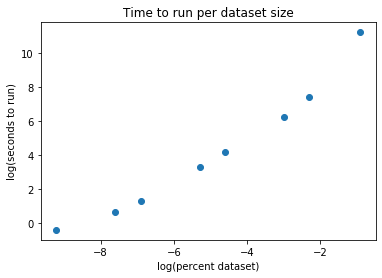

In [162]:
plt.scatter(x = np.log(sizes), y = np.log(times))
plt.title('Time to run per dataset size')
plt.xlabel('log(percent dataset)')
plt.ylabel('log(seconds to run)')

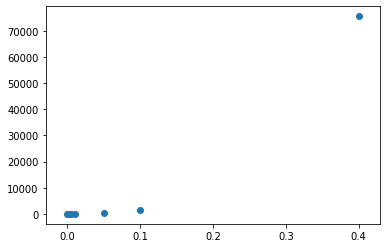

In [163]:
plt.scatter(x = sizes, y = times)

In [195]:
#Run a sgd regression with max_iter, fraction of total dataset, dataset, independent and dependent
#variables as the input variables
def sgdreg(max_iter, loss, frac, data, indep, dep):
    train_scores = []
    test_scores = []
    for x in range(10):
        starttime = dt.datetime.now()
        scaler = StandardScaler()
        propval_samples = data.sample(frac = 1, replace = False)
        ind_vars, dep_vars = get_reg_vars(propval_samples, propval_indep_reg, dep)
        ind_train, ind_test, dep_train, dep_test = train_test_split(ind_vars, dep_vars)
        scaler.fit(ind_train)
        ind_train = scaler.transform(ind_train)
        ind_test = scaler.transform(ind_test)
        sgd = SGDRegressor(max_iter = max_iter, loss = loss)
        sgd.fit(ind_train, dep_train)
        train_pred = sgd.predict(ind_train)
        test_pred = sgd.predict(ind_test)
        r_train_score = r2_score(dep_train, train_pred)
        r_test_score = r2_score(dep_test, test_pred)
        train_scores.append(r_train_score)
        test_scores.append(r_test_score)
    return train_scores, test_scores

In [ ]:
#So this runs super fast and scores terribly. Something's going badly wrong here.

In [ ]:
#This should be performing less terribly than this.

In [ ]:
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars = propval_samples[['ZIP', 'LND_AREA']]
dep_vars = propval_samples['EXPENSIVE']
rf.randfor_class_talk(ind_vars, dep_vars, 1000, 10, None, 1000)

In [ ]:
propval_samples = propval.sample(frac = .01, replace = False)
ind_vars = propval_samples[['ZIP', 'LND_AREA']]
dep_vars = propval_samples['FN_AVT_A']
rf.randfor_reg_talk(ind_vars, dep_vars, 1000, 10, None, 1000)

In [ ]:
#Even the regression model can do better than -6e27. ?

In [ ]:
sgdreg(1000, 'squared_loss', .01, propval, ['ZIP', 'LND_AREA'], 'FN_AVT_A')

In [ ]:
#Okay, after scaling the data this works better.

In [196]:
train_scores, test_scores = sgdreg(1000, 'squared_loss', 1000, propval, propval_indep_class, 'LOGVAL')

In [199]:
train_scores

[0.272992750549377,
 0.45056971475406693,
 0.45697867458265484,
 0.4519653728596018,
 0.3613897341720793,
 0.4511551192000056,
 -2.1933394188566155,
 0.4481989367573772,
 0.17930429756313582,
 0.40146723900410797]

In [204]:
test_scores

[0.308093938341261,
 0.3422978815669404,
 0.23754077653069017,
 0.22006639128831162,
 0.017075185747479682,
 0.3159911435183316,
 0.267059427551789,
 0.25024762379430643,
 0.4469275630953853]

In [205]:
np.mean(test_scores)

0.2672555479371661

In [206]:
np.std(test_scores)

0.10951693070137737

In [203]:
test_scores.pop(6)

-0.9422476418197292

In [ ]:
#Okay - regression is way more volatile and way worse than classification. Not super surprising,
#but still good to know. I wonder if I could combine a few classification models, say for three
#SDs in both directions?

In [5]:
boro_stds = propval.groupby('BORO').std()

In [6]:
boro_means = propval.groupby('BORO').mean()

In [16]:
boro_means.FN_AVT_A

BORO
1    148710.814380
2     23161.219546
3     26929.861880
4     28202.569118
5     23771.358802
Name: FN_AVT_A, dtype: float64

In [ ]:
#Zero-padding for borough indexing, as usual
boro_cutoffs = [[0], [0], [0], [0], [0], [0], [0], [0]]
for x in range(5):
    boro_cutoffs[0].append(boro_means.FN_AVT_A.values[x]-(1*boro_stds.FN_AVT_A.values[x]))
for x in range(5):
    boro_cutoffs[1].append(boro_means.FN_AVT_A.values[x]-(.66*boro_stds.FN_AVT_A.values[x]))
for x in range(5):
    boro_cutoffs[2].append(boro_means.FN_AVT_A.values[x]-(.33*boro_stds.FN_AVT_A.values[x]))
for x in range(5):
    boro_cutoffs[3].append(boro_means.FN_AVT_A.values[x])
for x in range(5):
    boro_cutoffs[4].append(boro_means.FN_AVT_A.values[x]+(.33*boro_stds.FN_AVT_A.values[x]))
for x in range(5):
    boro_cutoffs[5].append(boro_means.FN_AVT_A.values[x]+(.66*boro_stds.FN_AVT_A.values[x]))
for x in range(5):
    boro_cutoffs[6].append(boro_means.FN_AVT_A.values[x]+(1*boro_stds.FN_AVT_A.values[x]))

In [ ]:
es3 = []
es2 = []
es1 = []
EXPENSIVE = []
ep1 = []
ep2 = []
ep3 = []
for index, row in propval.iterrows():
    es3.append(row.FN_AVT_A >= boro_cutoffs[0][row.BORO])
    es2.append(row.FN_AVT_A >= boro_cutoffs[1][row.BORO])
    es1.append(row.FN_AVT_A >= boro_cutoffs[2][row.BORO])
    EXPENSIVE.append(row.FN_AVT_A >= boro_cutoffs[3][row.BORO])
    ep1.append(row.FN_AVT_A >= boro_cutoffs[4][row.BORO])
    ep2.append(row.FN_AVT_A >= boro_cutoffs[5][row.BORO])
    ep3.append(row.FN_AVT_A >= boro_cutoffs[6][row.BORO])

In [ ]:
#We're tracking whether a value per borough is greater than the mean valuation in that borough or not.

In [ ]:
propval['EXP_SUB_3'] = es3
propval['EXP_SUB_2'] = es2
propval['EXP_SUB_1'] = es1
propval['EXPENSIVE'] = EXPENSIVE
propval['EXP_ADD_1'] = ep1
propval['EXP_ADD_2'] = ep2
propval['EXP_ADD_3'] = ep3

In [ ]:
propval.EXP_SUB_3.value_counts()

In [ ]:
propval.EXP_SUB_2.value_counts()

In [ ]:
propval.EXP_SUB_1.value_counts()

In [ ]:
propval.EXPENSIVE.value_counts()

In [ ]:
propval.EXP_ADD_1.value_counts()

In [ ]:
propval.EXP_ADD_2.value_counts()

In [ ]:
propval.EXP_ADD_3.value_counts()

In [ ]:
#Technically this was data cleaning, and also it took ages to run, so I'm saving it. This should
#also protect against memory errors.

In [ ]:
propval.to_csv('clean_propval_final.csv')

In [4]:
propval = pd.read_csv('clean_propval_final.csv')

C:\Users\marcu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,22,24,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
propval_indep_class = ['YEAR4', 'ZIP', 'LFRT_DEC',
       'BFRT_DEC', 'BDEP_DEC', 'LND_AREA', 'GR_SQFT',
       'ZONING', 'CP_BORO', 'CP_DIST', 'YRB_OLD']

In [11]:
propval_samples = propval.sample(frac = .01, replace = False)
all_metrics = ['EXP_SUB_3', 'EXP_SUB_2', 'EXP_SUB_1', 'EXPENSIVE',\
               'EXP_ADD_1', 'EXP_ADD_2', 'EXP_ADD_3']

In [42]:
starttime = dt.datetime.now()
ind_data = propval_samples[propval_indep_class]
dep_data = propval_samples[all_metrics]
x_train, x_test, y_train, y_test = train_test_split(ind_data, dep_data)
predictions = []
overfit = []
scores = []
for metric in all_metrics:
    print(metric)
    rf_model = RandomForestClassifier(n_estimators = 1000, max_depth = 10, min_samples_split = 100)
    rf_model.fit(x_train, y_train[metric])
    train_pred = rf_model.predict(x_train)
    test_pred = rf_model.predict(x_test)
    score_diff = accuracy_score(y_train[metric], train_pred) - accuracy_score(y_test[metric], test_pred)
    predictions.append(test_pred)
    overfit.append(score_diff)
    scores.append(accuracy_score(y_train[metric], train_pred))
print('elapsed time:', dt.datetime.now()-starttime)

EXP_SUB_3
EXP_SUB_2
EXP_SUB_1
EXPENSIVE
EXP_ADD_1
EXP_ADD_2
EXP_ADD_3
elapsed time: 0:03:51.656098


In [114]:
scores

[0.995213532227334,
 0.9732097216413402,
 0.9379385659184907,
 0.8686974301779823,
 0.9320832752451322,
 0.9681444305032761,
 0.9826200102235234]

In [43]:
predictions[0]

array([ True,  True,  True, ...,  True,  True,  True])

In [80]:
#take an array of predictions as formed in the code above and return an array with the
#bracket of each one
def bracket_results(predictions):
    anomaly = 0
    switch = 0
    bracket = []
    #Check 1-6 not 1-7 because we consult the one above y as well
    for x in range(len(predictions[0])):
        #If we don't think the property will be >= 1 SD below mean borough valuation:
        if predictions[0][x] == False:
            bracket.append(-1)
        #Otherwise assume it is valued >= 1 SD above mean borough valuation
        else:
            bracket.append(6)
        for y in range(6):
            if predictions[y][x] == False and predictions[y+1][x] == True:
                anomaly += 1
            #If we find a break, edit to the relevant bracket
            if predictions[y][x] == True and predictions[y+1][x] == False:
                switch += 1
                bracket[-1] = y
    return bracket, anomaly, switch

In [81]:
bracket, anomaly, switch = bracket_results(predictions)

In [82]:
len(predictions[0])

14347

In [83]:
results = {}
for x in bracket:
    if x not in results:
        results[x] = 0
    else:
        results[x] += 1

In [84]:
results

{2: 6723, 3: 4848, 1: 1305, 5: 157, 0: 249, 4: 805, -1: 145, 6: 107}

In [76]:
len(bracket)

14347

In [87]:
predictions

[array([ True,  True,  True, ...,  True,  True,  True]),
 array([ True,  True,  True, ...,  True,  True,  True]),
 array([ True,  True, False, ...,  True,  True,  True]),
 array([False,  True, False, ...,  True,  True, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False])]

In [86]:
y_test

,EXP_SUB_3,EXP_SUB_2,EXP_SUB_1,EXPENSIVE,EXP_ADD_1,EXP_ADD_2,EXP_ADD_3
4515092,True,True,True,True,False,False,False
5381806,True,True,True,True,False,False,False
1717150,True,True,False,False,False,False,False
1337891,True,True,True,True,True,True,False
2361004,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...
4275762,True,True,True,True,False,False,False
3031582,True,True,True,True,True,True,False
221537,True,True,True,True,False,False,False
5346242,True,True,True,False,False,False,False


In [94]:
results = []
for x in y_test.columns:
    results.append(y_test[x].values)

In [95]:
results

[array([ True,  True,  True, ...,  True,  True,  True]),
 array([ True,  True,  True, ...,  True,  True,  True]),
 array([ True,  True, False, ...,  True,  True,  True]),
 array([ True,  True, False, ...,  True, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False])]

In [96]:
bracket_actual, anomaly_actual, switch_actual = bracket_results(results)

In [99]:
divergence = []
for x in range(len(bracket_actual)):
    divergence.append(bracket_actual[x]-bracket[x])

In [108]:
abs_divergence = [abs(num) for num in divergence]

In [118]:
correct = 0
within_1 = 0
for x in abs_divergence:
    if x == 0:
        correct += 1
    if x == 1:
        within_1 += 1

In [119]:
correct/len(abs_divergence)

0.6769359447968216

In [120]:
(within_1+correct)/len(abs_divergence)

0.9605492437443368

In [110]:
np.mean(abs_divergence)

0.3733881647731233

In [111]:
np.std(divergence)

0.7082802679267964

In [112]:
3/14000

0.00021428571428571427

In [113]:
accuracy_score(bracket_actual, bracket)

0.6769359447968216

In [10]:
3/14000

0.00021428571428571427

In [5]:
features = ['Gross sq. footage', 'ZIP code', 'Year built*', 'Community planning board #',\
           'Building frontage (ft)', 'Year of valuation', 'Land area', 'Lot frontage (ft)',\
           'Zoning code', 'Lot depth (ft)']
weights = [.369, .127, .109, .107, .071, .067, .056, .043, .037, .014]

In [7]:
features.reverse()
weights.reverse()

Text(0, 0.5, 'Importance')

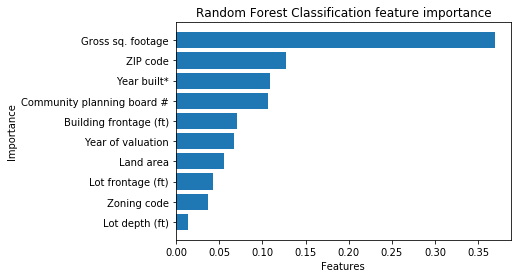

In [9]:
plt.barh(features, weights)
plt.title('Random Forest Classification feature importance')
plt.xlabel('Features')
plt.ylabel('Importance')

In [12]:
propval.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'BORO', 'BLOCK', 'LOT',
       'SECVOL', 'DISTRICT', 'YEAR4', 'CUR_FV_L', 'CUR_FV_T', 'NEW_FV_L',
       'NEW_FV_T', 'FV_CHGDT', 'CURAVL', 'CURAVT', 'CUREXL', 'CUREXT',
       'CURAVL_A', 'CURAVT_A', 'CUREXL_A', 'CUREXT_A', 'CHGDT', 'TN_EXT',
       'FCHGDT', 'FN_AVL', 'FN_AVT', 'FN_EXL', 'FN_EXT', 'FN_AVL_A',
       'FN_AVT_A', 'FN_EXL_A', 'FN_EXT_A', 'ZIP', 'TOT_UNIT', 'RES_UNIT',
       'LFRT_DEC', 'LDEP_DEC', 'BFRT_DEC', 'BDEP_DEC', 'STORY', 'LND_AREA',
       'GR_SQFT', 'ZONING', 'YRB_FLAG', 'CP_BORO', 'CP_DIST', 'STATUS1',
       'EX_INDS', 'EX_COUNT', 'DCHGDT', 'SM_CHGDT', 'CBN_TXCL1', 'CBN_TXCL0',
       'CBN_TXCL1B', 'CBN_TXCL1A', 'BLDGCLA', 'BLDGCLB', 'BLDGCLC', 'BLDGCLR',
       'BLDGCLV', 'BLDGCLS', 'EXTG', 'EXTEG', 'EXTE', 'YRB_NEW', 'YRB_OLD',
       'EXP_SUB_3', 'EXP_SUB_2', 'EXP_SUB_1', 'EXPENSIVE', 'EXP_ADD_1',
       'EXP_ADD_2', 'EXP_ADD_3'],
      dtype='object')

In [7]:
print('complete')

complete


In [9]:
percent_of_mean = []
for index, row in propval.iterrows():
    percent_of_mean.append((row.FN_AVT_A/boro_means.FN_AVT_A[row.BORO])*100)

In [20]:
propval['MEAN_PERCENT'] = percent_of_mean

Text(0, 0.5, 'Number of properties')

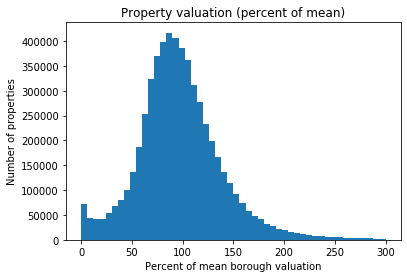

In [22]:
plt.hist(propval.MEAN_PERCENT, range = (0, 300), bins = 50)
plt.title('Property valuation (percent of mean)')
plt.xlabel('Percent of mean borough valuation')
plt.ylabel('Number of properties')

In [23]:
man_data = propval[propval.BORO == 1]

In [25]:
zip_man = man_data.groupby(['ZIP']).mean()

Text(0, 0.5, 'Mean valuation')

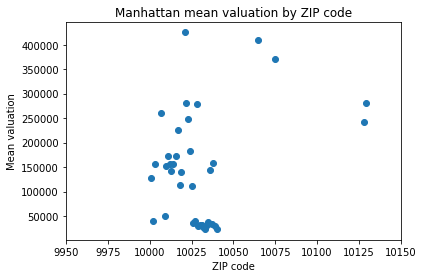

In [32]:
plt.scatter(x = zip_man.index, y = zip_man.FN_AVT_A)
plt.xlim(9950, 10150)
plt.title('Manhattan mean valuation by ZIP code')
plt.xlabel('ZIP code')
plt.ylabel('Mean valuation')

In [36]:
len(man_data.ZIP.value_counts())

40